In [8]:
import torch
from torch import Tensor
import torch.nn.functional as F
from torch import nn, optim
import math
from matplotlib import pyplot as plt
import copy

### Setting vocab

In [9]:
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

In [10]:
print(len(test_sentence))
print(test_sentence[:11])

115
['When', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow,', 'And', 'dig', 'deep', 'trenches']


In [11]:
SENTENCE_LENGTH = 5

bigram = [(
    test_sentence[i:i + SENTENCE_LENGTH],  # input
    test_sentence[i + 1: i+ SENTENCE_LENGTH + 1]  # label
) for i in range(len(test_sentence) - SENTENCE_LENGTH)]

vocab = set(test_sentence)
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {word_to_idx[word]: word for word in word_to_idx}

In [12]:
bigram[:10]

[(['When', 'forty', 'winters', 'shall', 'besiege'],
  ['forty', 'winters', 'shall', 'besiege', 'thy']),
 (['forty', 'winters', 'shall', 'besiege', 'thy'],
  ['winters', 'shall', 'besiege', 'thy', 'brow,']),
 (['winters', 'shall', 'besiege', 'thy', 'brow,'],
  ['shall', 'besiege', 'thy', 'brow,', 'And']),
 (['shall', 'besiege', 'thy', 'brow,', 'And'],
  ['besiege', 'thy', 'brow,', 'And', 'dig']),
 (['besiege', 'thy', 'brow,', 'And', 'dig'],
  ['thy', 'brow,', 'And', 'dig', 'deep']),
 (['thy', 'brow,', 'And', 'dig', 'deep'],
  ['brow,', 'And', 'dig', 'deep', 'trenches']),
 (['brow,', 'And', 'dig', 'deep', 'trenches'],
  ['And', 'dig', 'deep', 'trenches', 'in']),
 (['And', 'dig', 'deep', 'trenches', 'in'],
  ['dig', 'deep', 'trenches', 'in', 'thy']),
 (['dig', 'deep', 'trenches', 'in', 'thy'],
  ['deep', 'trenches', 'in', 'thy', "beauty's"]),
 (['deep', 'trenches', 'in', 'thy', "beauty's"],
  ['trenches', 'in', 'thy', "beauty's", 'field,'])]

In [13]:
vocab = set(test_sentence)
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {word_to_idx[word]: word for word in word_to_idx}

## ZeroLayerTransformer

In [14]:
class ZeroLayerTransformer(nn.Module):
    def __init__(self, vocab_size: int, token_embed_size: int, hidden_size: int):
        super(ZeroLayerTransformer, self).__init__()
        self.n_word = vocab_size
        self.token_embedding = nn.Embedding(self.n_word, token_embed_size)
        
        self.embed = ## Fill this line
        self.unembed = ## Fill this line
        
    def forward(self, x: Tensor):
        token_embed = self.token_embedding(x)
        
        embed = self.embed(token_embed)
        # embed = F.relu(embed)
        
        output = self.unembed(embed)
        log_prob = F.log_softmax(output, dim=-1)
        
        return log_prob

SyntaxError: invalid syntax (2791384822.py, line 7)

In [29]:
zerolayertransformer = ZeroLayerTransformer(
    vocab_size=len(word_to_idx),
    token_embed_size=100,
    hidden_size=128
)

### Model Train

In [30]:
def train(model, epochs_num: int = 500):
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=1e-3)

    for epoch in range(epochs_num):
        print('epoch: {}'.format(epoch + 1))
        print('*' * 10)
        running_loss = 0
        for data in bigram:
            words, labels = data

            words = torch.LongTensor([word_to_idx[word] for word in words])
            labels = torch.LongTensor([word_to_idx[label] for label in labels])

            # forward
            out = model(words)
            # print(out)
            loss = criterion(out, labels)

            running_loss += loss.item()

            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print('Loss: {:.6f}'.format(running_loss / len(word_to_idx)))


In [31]:
train(zerolayertransformer)

epoch: 1
**********
Loss: 5.237314
epoch: 2
**********
Loss: 5.147413
epoch: 3
**********
Loss: 5.058027
epoch: 4
**********
Loss: 4.969051
epoch: 5
**********
Loss: 4.880385
epoch: 6
**********
Loss: 4.791939
epoch: 7
**********
Loss: 4.703631
epoch: 8
**********
Loss: 4.615388
epoch: 9
**********
Loss: 4.527147
epoch: 10
**********
Loss: 4.438856
epoch: 11
**********
Loss: 4.350475
epoch: 12
**********
Loss: 4.261977
epoch: 13
**********
Loss: 4.173349
epoch: 14
**********
Loss: 4.084593
epoch: 15
**********
Loss: 3.995726
epoch: 16
**********
Loss: 3.906780
epoch: 17
**********
Loss: 3.817801
epoch: 18
**********
Loss: 3.728847
epoch: 19
**********
Loss: 3.639990
epoch: 20
**********
Loss: 3.551305
epoch: 21
**********
Loss: 3.462875
epoch: 22
**********
Loss: 3.374782
epoch: 23
**********
Loss: 3.287111
epoch: 24
**********
Loss: 3.199941
epoch: 25
**********
Loss: 3.113351
epoch: 26
**********
Loss: 3.027416
epoch: 27
**********
Loss: 2.942212
epoch: 28
**********
Loss: 2.857813
e

### Model Test

In [99]:
def plot_attention(attention_score):
    fig, axes = plt.subplots(1, len(attention_score))
    for i, score in enumerate(attention_score):
        img = axes[i].imshow(score)
    fig.tight_layout()
    plt.show()

def evaluate(model, sample_idx: int, with_attention: bool = False):
    words, labels = bigram[sample_idx]
    words = torch.LongTensor([word_to_idx[word] for word in words])
    
    if with_attention:
        out, attention_score = model(words, with_attention=True)
        attention_score = attention_score.cpu().detach().numpy()
        plot_attention(attention_score)
    else:
        out = model(words)

    predicted_labels = torch.argmax(out, dim=-1)
    predicted_words = [idx_to_word[prediction] for prediction in predicted_labels.tolist()]

    print('real words are {}, predicted words are {}'.format(labels, predicted_words))

In [100]:
# right answer case
evaluate(zerolayertransformer, 2)

real words are ['shall', 'besiege', 'thy', 'brow,', 'And'], predicted words are ['shall', 'besiege', 'thy', "beauty's", 'And']


In [101]:
# wrong answer case
evaluate(zerolayertransformer, 5)

real words are ['brow,', 'And', 'dig', 'deep', 'trenches'], predicted words are ["beauty's", 'And', 'see', 'deep', 'sunken']


In [102]:
# why wrong?
# bigram result with 'thy'

# ('thy', 'brow,'),
# ('thy', "beauty's")
# ('Thy', "youth's")
# ('thy', 'beauty'),
# ('thy', 'lusty'),
# ('thy', "beauty's")
# ('thy', 'blood'),

## OneLayerTransformer

In [103]:
class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_size: int, heads_num: int):
        super(MultiHeadAttention, self).__init__()
        assert hidden_size % heads_num == 0
        self.head_size = ## Fill this line 
        self.hidden_size = hidden_size
        self.heads_num = heads_num
        
        self.w_q = ## Fill this line 
        self.w_k = ## Fill this line 
        self.w_v = ## Fill this line 
        self.w_o = ## Fill this line 
    
    def split_to_heads(self, item: Tensor) -> Tensor:
        item_shape = item.shape[:-1] # B, S, D
        item = item.reshape(
            *item_shape, self.heads_num, self.head_size
        ) # B, S, H_num, H_size
        
        item = item.transpose(-2, -3) # B, H_num, S, H_size
        return item
    
    def combine_from_heads(self, item: Tensor) -> Tensor:
        item = item.transpose(-2, -3) # B, S, H_num, H_size
        item_shape = item.shape[:-2] 
        item = item.reshape(*item_shape, self.hidden_size)
        return item
    
    def forward(self, q: Tensor, k: Tensor, v: Tensor) -> Tensor:
        q = self.split_to_heads(self.w_q(q)) # B, S, D -> B, H_num, S, H_size
        k = self.split_to_heads(self.w_k(k)) # B, S, D -> B, H_num, S, H_size
        v = self.split_to_heads(self.w_v(v)) # B, S, D -> B, H_num, S, H_size
 
        k_transpose = torch.transpose(k, -2, -1)
        
        attention_map = q @ k_transpose / math.sqrt(self.head_size) # B, H_num, S, S
        attention_score = F.softmax(attention_map, dim=-1)
        
        attention_result = attention_score @ v # B, H_num, S, H_size
        attention_result = self.combine_from_heads(attention_result) # B, S, D
        
        return self.w_o(attention_result), attention_score # B, S, D

class OneLayerTransformer(nn.Module):
    def __init__(self, vocab_size: int, token_embed_size: int, hidden_size: int, heads_num: int):
        super(OneLayerTransformer, self).__init__()
        self.n_word = vocab_size
        self.token_embedding = nn.Embedding(self.n_word, token_embed_size)
        self.embed = nn.Linear(token_embed_size, hidden_size)
        self.unembed = nn.Linear(hidden_size, self.n_word)
        
        self.mha = MultiHeadAttention( hidden_size=hidden_size, heads_num=heads_num)
        
    def forward(self, x: Tensor, with_attention: bool = False) -> Tensor:
        token_embed = self.token_embedding(x)
        embed = self.embed(token_embed)
        embed = F.relu(embed)
        
        x, attention_score = self.mha(embed, embed, embed)
        x1 = ## Fill this line # residual connection
        output = self.unembed(x1)
        log_prob = F.log_softmax(output, dim=-1)
        
        if with_attention:
            return log_prob, attention_score

        return log_prob

In [104]:
onelayertransformer = OneLayerTransformer(
    vocab_size=len(word_to_idx),
    token_embed_size=100,
    hidden_size=128,
    heads_num=4
)

In [50]:
train(onelayertransformer)

epoch: 1
**********
Loss: 5.198430
epoch: 2
**********
Loss: 5.157236
epoch: 3
**********
Loss: 5.116435
epoch: 4
**********
Loss: 5.075919
epoch: 5
**********
Loss: 5.035645
epoch: 6
**********
Loss: 4.995493
epoch: 7
**********
Loss: 4.955404
epoch: 8
**********
Loss: 4.915423
epoch: 9
**********
Loss: 4.875515
epoch: 10
**********
Loss: 4.835665
epoch: 11
**********
Loss: 4.795848
epoch: 12
**********
Loss: 4.756007
epoch: 13
**********
Loss: 4.716089
epoch: 14
**********
Loss: 4.676061
epoch: 15
**********
Loss: 4.635898
epoch: 16
**********
Loss: 4.595572
epoch: 17
**********
Loss: 4.555035
epoch: 18
**********
Loss: 4.514373
epoch: 19
**********
Loss: 4.473463
epoch: 20
**********
Loss: 4.432249
epoch: 21
**********
Loss: 4.390792
epoch: 22
**********
Loss: 4.349130
epoch: 23
**********
Loss: 4.307187
epoch: 24
**********
Loss: 4.264976
epoch: 25
**********
Loss: 4.222484
epoch: 26
**********
Loss: 4.179763
epoch: 27
**********
Loss: 4.136755
epoch: 28
**********
Loss: 4.093566
e

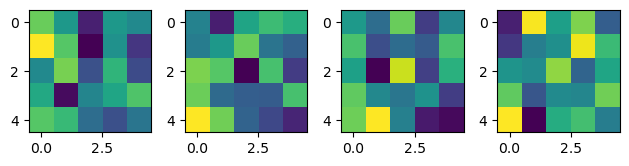

real words are ['shall', 'besiege', 'thy', 'brow,', 'And'], predicted words are ['Proving', 'Proving', 'lies,', 'being', 'fair']


In [105]:
evaluate(onelayertransformer, 2, with_attention=True)

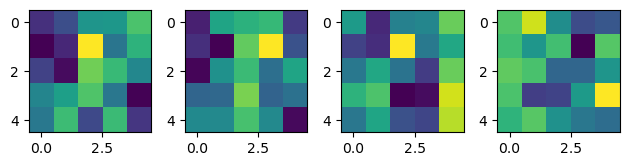

real words are ['brow,', 'And', 'dig', 'deep', 'trenches'], predicted words are ['being', 'fair', 'art', 'eyes,', 'Thy']


In [106]:
evaluate(onelayertransformer, 5, with_attention=True)

In [7]:
bigram[:10]

[(['When', 'forty', 'winters', 'shall', 'besiege'],
  ['forty', 'winters', 'shall', 'besiege', 'thy']),
 (['forty', 'winters', 'shall', 'besiege', 'thy'],
  ['winters', 'shall', 'besiege', 'thy', 'brow,']),
 (['winters', 'shall', 'besiege', 'thy', 'brow,'],
  ['shall', 'besiege', 'thy', 'brow,', 'And']),
 (['shall', 'besiege', 'thy', 'brow,', 'And'],
  ['besiege', 'thy', 'brow,', 'And', 'dig']),
 (['besiege', 'thy', 'brow,', 'And', 'dig'],
  ['thy', 'brow,', 'And', 'dig', 'deep']),
 (['thy', 'brow,', 'And', 'dig', 'deep'],
  ['brow,', 'And', 'dig', 'deep', 'trenches']),
 (['brow,', 'And', 'dig', 'deep', 'trenches'],
  ['And', 'dig', 'deep', 'trenches', 'in']),
 (['And', 'dig', 'deep', 'trenches', 'in'],
  ['dig', 'deep', 'trenches', 'in', 'thy']),
 (['dig', 'deep', 'trenches', 'in', 'thy'],
  ['deep', 'trenches', 'in', 'thy', "beauty's"]),
 (['deep', 'trenches', 'in', 'thy', "beauty's"],
  ['trenches', 'in', 'thy', "beauty's", 'field,'])]

## TwoLayerTransformer

In [113]:
def clones(module, N):
    "Produce N identical layers."
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

class Decoder(nn.Module):
    def __init__(self, hidden_size: int, heads_num: int):
        super(Decoder, self).__init__()
        self.mha = MultiHeadAttention(hidden_size=hidden_size, heads_num=heads_num)
    
    def forward(self, x: Tensor) -> Tensor:
        x0, attention_score = self.mha(x, x, x)
        x1 = ## Fill this line # residual connection 
        
        return x1, attention_score
        
class TwoLayerTransformer(nn.Module):
    def __init__(self, vocab_size: int, token_embed_size: int, hidden_size: int, heads_num: int):
        super(TwoLayerTransformer, self).__init__()
        self.n_word = vocab_size
        self.token_embedding = nn.Embedding(self.n_word, token_embed_size)
        self.embed = ## Fill this line # residual connection
        self.unembed = ## Fill this line # residual connection
        
        self.decoders = clones(Decoder(hidden_size=hidden_size, heads_num=heads_num), N=2) # 2 layers
        
    def forward(self, x: Tensor, with_attention: bool = False) -> Tensor:
        token_embed = self.token_embedding(x)
        embed = self.embed(token_embed)
        x = F.relu(embed)

        for decoder in self.decoders:
            x, attention_score = decoder(x)
            
        output = self.unembed(x)
        log_prob = F.log_softmax(output, dim=-1)

        if with_attention:
            return log_prob, attention_score

        return log_prob

In [114]:
twolayertransformer = TwoLayerTransformer(
    vocab_size=len(word_to_idx),
    token_embed_size=100,
    hidden_size=128,
    heads_num=4
)

In [115]:
train(twolayertransformer)

epoch: 1
**********
Loss: 5.243575
epoch: 2
**********
Loss: 5.196825
epoch: 3
**********
Loss: 5.150759
epoch: 4
**********
Loss: 5.105265
epoch: 5
**********
Loss: 5.060147
epoch: 6
**********
Loss: 5.015346
epoch: 7
**********
Loss: 4.970820
epoch: 8
**********
Loss: 4.926529
epoch: 9
**********
Loss: 4.882434
epoch: 10
**********
Loss: 4.838496
epoch: 11
**********
Loss: 4.794660
epoch: 12
**********
Loss: 4.750861
epoch: 13
**********
Loss: 4.707050
epoch: 14
**********
Loss: 4.663205
epoch: 15
**********
Loss: 4.619269
epoch: 16
**********
Loss: 4.575270
epoch: 17
**********
Loss: 4.531198
epoch: 18
**********
Loss: 4.487051
epoch: 19
**********
Loss: 4.442785
epoch: 20
**********
Loss: 4.398390
epoch: 21
**********
Loss: 4.353848
epoch: 22
**********
Loss: 4.309173
epoch: 23
**********
Loss: 4.264312
epoch: 24
**********
Loss: 4.219270
epoch: 25
**********
Loss: 4.174039
epoch: 26
**********
Loss: 4.128508
epoch: 27
**********
Loss: 4.082656
epoch: 28
**********
Loss: 4.036506
e

In [7]:
bigram[:10]

[(['When', 'forty', 'winters', 'shall', 'besiege'],
  ['forty', 'winters', 'shall', 'besiege', 'thy']),
 (['forty', 'winters', 'shall', 'besiege', 'thy'],
  ['winters', 'shall', 'besiege', 'thy', 'brow,']),
 (['winters', 'shall', 'besiege', 'thy', 'brow,'],
  ['shall', 'besiege', 'thy', 'brow,', 'And']),
 (['shall', 'besiege', 'thy', 'brow,', 'And'],
  ['besiege', 'thy', 'brow,', 'And', 'dig']),
 (['besiege', 'thy', 'brow,', 'And', 'dig'],
  ['thy', 'brow,', 'And', 'dig', 'deep']),
 (['thy', 'brow,', 'And', 'dig', 'deep'],
  ['brow,', 'And', 'dig', 'deep', 'trenches']),
 (['brow,', 'And', 'dig', 'deep', 'trenches'],
  ['And', 'dig', 'deep', 'trenches', 'in']),
 (['And', 'dig', 'deep', 'trenches', 'in'],
  ['dig', 'deep', 'trenches', 'in', 'thy']),
 (['dig', 'deep', 'trenches', 'in', 'thy'],
  ['deep', 'trenches', 'in', 'thy', "beauty's"]),
 (['deep', 'trenches', 'in', 'thy', "beauty's"],
  ['trenches', 'in', 'thy', "beauty's", 'field,'])]

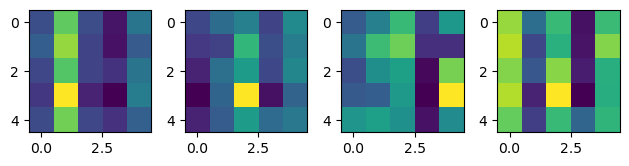

real words are ['shall', 'besiege', 'thy', 'brow,', 'And'], predicted words are ['shall', 'besiege', 'thy', 'brow,', 'And']


In [116]:
evaluate(twolayertransformer, 2, with_attention=True)

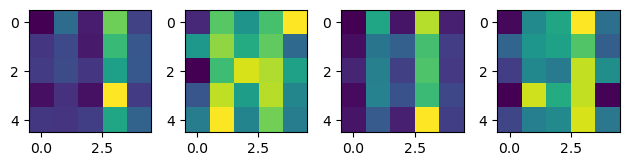

real words are ['brow,', 'And', 'dig', 'deep', 'trenches'], predicted words are ['brow,', 'And', 'dig', 'deep', 'trenches']


In [117]:
evaluate(twolayertransformer, 5, with_attention=True)